In [1]:
import os
import pandas as pd
os.chdir('/Users/lilimatic/var_imp_mis')
from function import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.nonparametric.api as nparam
from statsmodels.nonparametric.kernel_regression import KernelReg

/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('data_sim.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
n = len(df[:10])

df = df[:n]

eps = np.random.normal(0, 0.1, n)

a = 2
b = 2

b0=0.5
b1 = 0.5

sim = 10

p = 0.7

In [4]:
y_hat = dataset(n,df).ishigami(eps)(a,b)

In [5]:
def sobol_reg_iwp(df,n1,request,sim,a,b,eps,y_hat,p):
    sobol_list = []
    df1 = df.copy()
    for x in range(sim):
        #Pick-Freezed
        df_pf   = dataset(n1,df).picked(request,a,b)
        df_pf['Y'] = dataset(n1,df_pf).ishigami(eps)(a,b)
        model_pf = KernelReg(endog=[df_pf['Y'].to_numpy()],exog=[df_pf['X1'],df_pf['X2'],df_pf['X3']],reg_type='lc',var_type='ccc', bw='cv_ls')
        df_pf['Y_hat'] = model_pf.fit([df_pf['X1'],df_pf['X2'],df_pf['X3']])[0]/p
        sobol_list.append((np.cov(y_hat/p,df_pf['Y_hat'],bias=True)/np.var(y_hat))[0][1])
    return sobol_list

In [6]:
#sobol_reg(df,n,['X2','X3'],10,a,b,eps,y_hat)

In [7]:
def singletons_reg_iwp(df,n1,sim,a,b,eps,y_hat,p):
    singleton = []
    for x in [['X2','X3'],['X1','X3'],['X1','X2']]:
        singleton.append(sobol_reg_iwp(df,n1,x,sim,a,b,eps,y_hat,p))
    return pd.DataFrame(dict(zip(['X1','X2','X3'],singleton)))




In [8]:
def singleton_reg_iwp(df,Xi,n,p,sample):
    omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= p),columns=[Xi])
    omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)
    cc = df.where(omega==1,np.nan).dropna()
    print(len(cc))
    single_sobol_cc = singletons_reg_iwp(df,n,sim,a,b,eps,y_hat,p)
    #fig, ax = plt.subplots()
    #ax.boxplot(single_sobol_cc)
    #ax.set_xticklabels(single_sobol_cc.columns)
    single_sobol_cc['sample'] = sample
    return single_sobol_cc

In [9]:
#singleton_reg(df,'X1',n,p,'cc')

X1 is missing

0.9
10


/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: divide by zero encountered in divide
  B_x = d_

10


/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: divide by zero encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_den

X2 is missing

0.9
10


/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: divide by zero encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: divide by zero encountered in divide
  B_x = d

8


/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
<ipython-input-10-35d6d1e695db>:18: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.9
10


/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/l

9


/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_num

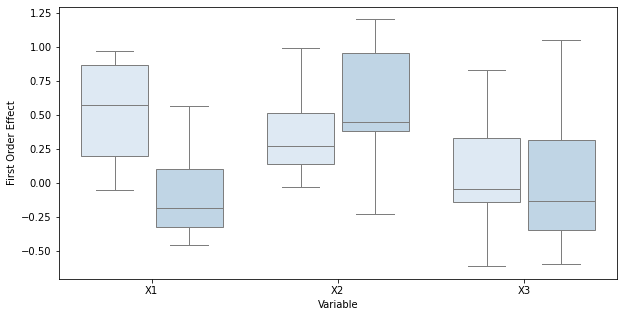

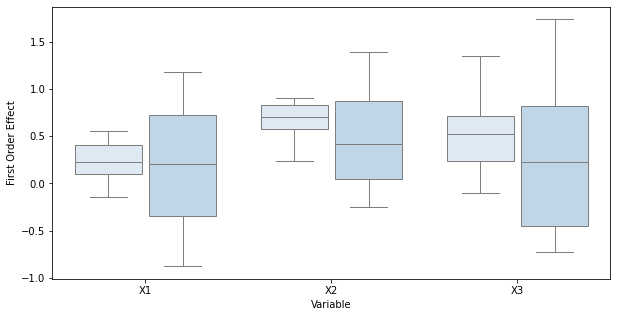

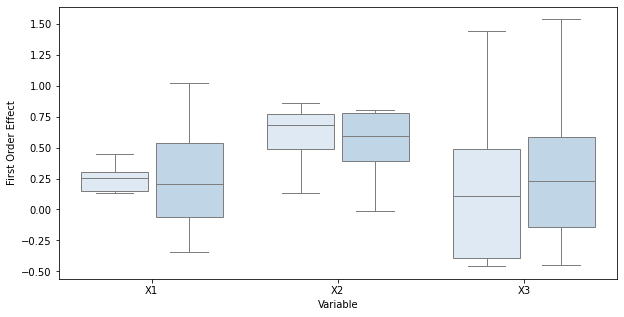

In [10]:
for x in ['X1','X2','X3']: #0.4,0.7,
    for p in [0.9]: #0.4,0.7,
        print(x+ ' is missing')
        print()
        print(p)
        single_sobol = singleton_reg_iwp(df,x,n,1,'complete')
        single_sobol_cc = singleton_reg_iwp(df,x,n,p,'cc')

        cdf = pd.concat([single_sobol, single_sobol_cc],axis=0)  
    
        dd = pd.melt(cdf, id_vars= ['sample'],value_vars=['X1','X2','X3'],var_name='Variable')
        dd = dd.rename(columns={'value':'First Order Effect'})
        
        dd.to_csv(f'nonparametric regression/mcar_run/{x}_mcar_{p}_ipw.csv')
 
        fig, ax = plt.subplots(1, 1,figsize=(10, 5))
    
        ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'
        ax.legend_.remove()
        #ax.set(ylim=(0, 0.6))
        fig = ax.get_figure()
        adjust_box_widths(fig, 0.9)
        fig.savefig('nonparametric regression/mcar/MCAR_'+str(x)+'_'+str(p)+'_iwp.pdf',transparent=True,bbox_inches='tight')
